In [1]:
Use Pandas to read the following CSV files into DataFrames. Be sure to convert the dates to a DateTimeIndex.

whale_returns.csv: Contains returns of some famous "whale" investors' portfolios.

algo_returns.csv: Contains returns from the in-house trading algorithms from your company.

sp_tsx_history.csv: Contains historical closing prices of the S&P TSX 60 Index.

Identify and remove null values.

Remove any non-numeric values (e.g., dollar signs) from the DataFrames and convert the data types as needed.

The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P TSX 60 CSV file contains closing prices. Convert the S&P TSX 60 closing prices to daily returns.

Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

SyntaxError: unterminated string literal (detected at line 3) (3921312497.py, line 3)

In [3]:

# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Cleaning the Data

In [4]:
# Read in data
csv_path =  Path("Starter_code/Resources/whale_returns.csv")
whale_returns = pd.read_csv(csv_path, parse_dates=True, index_col='Date',infer_datetime_format=True)
#whale_returns['row_number'] = whale_returns.reset_index().index
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Read in data
csv_path2 =  Path("Starter_code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(csv_path2, parse_dates=True, index_col='Date',infer_datetime_format=True)
#algo_returns['row_number'] = algo_returns.reset_index().index
algo_returns.head()
# ,  index_col='Date'

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Read in data
# parse_dates=True, index_col="Date": to match the Date convention of the other data frames
csv_path3 =  Path("Starter_code/Resources/sp_tsx_history.csv")
sp_tsx =  pd.read_csv(csv_path3, parse_dates=True, index_col="Date", infer_datetime_format=True)
#sp_tsx =  pd.read_csv(csv_path3, infer_datetime_format=True)
#sp_tsx['row_number'] = sp_tsx.reset_index().index
sp_tsx

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [7]:
# Identifying null values
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
#Dropping null values in a copy of the original data frame to not alter it

whale_returns2 = whale_returns.dropna().copy() 
whale_returns2

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [9]:
# Identifying null values
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
#Dropping null values in a copy of the original data frame to not alter it
algo_returns2 = algo_returns.dropna().copy() 
algo_returns2

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
# Identifying null values
sp_tsx.isnull().sum()

Close    0
dtype: int64

In [12]:
#Dropping null values in a copy of the original data frame to not alter it

sp_tsx2 = sp_tsx.dropna().copy() 
sp_tsx2

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [13]:

Remove any non-numeric values (e.g., dollar signs) from the DataFrames and convert the data types as needed.

The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P TSX 60 CSV file contains closing prices. Convert the S&P TSX 60 closing prices to daily returns.


SyntaxError: invalid syntax (2953675299.py, line 1)

In [14]:
#checking data types
whale_returns2.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [15]:
#checking data types
algo_returns2.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [16]:
#checking data types
sp_tsx2.dtypes
# we need to change the Close data type from object to numeric

Close    object
dtype: object

In [17]:
# removing $ sign from Close column
sp_tsx2["Close"] = sp_tsx2["Close"].str.strip("$")
sp_tsx2

,Close
Date,
2012-10-01,"12,370.19"
2012-10-02,"12,391.23"
2012-10-03,"12,359.47"
2012-10-04,"12,447.68"
2012-10-05,"12,418.99"
...,...
2019-12-20,"17,118.44"
2019-12-23,"17,128.71"
2019-12-24,"17,180.15"


In [18]:
# removing commas, with commas it's impossible to convert to numeric type
sp_tsx2 = sp_tsx2.replace(',','', regex=True)
sp_tsx2

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [19]:
# converting Close column to numeric type
sp_tsx2["Close"] = pd.to_numeric(sp_tsx2["Close"])
sp_tsx2

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [20]:
#The whale portfolios and algorithmic portfolio CSV files contain daily returns, but the S&P TSX 60 CSV file contains closing prices. Convert the S&P TSX 60 closing prices to daily returns.
#1. create column daily returns
#2. input formula pct.change()



In [21]:
sp_tsx2.pct_change()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [22]:
# calculating daily returns with pct_chane() function and inputing result in the Daily Returns column, since we only have the Close column it will automaticcaly calculate daily returns from it no need ot do anything additional
sp_tsx2["S&P TSX"] = sp_tsx2.pct_change()
sp_tsx2


,Close,S&P TSX
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305
...,...,...
2019-12-20,17118.44,0.003188
2019-12-23,17128.71,0.000600
2019-12-24,17180.15,0.003003


In [23]:
# Separate ticker data
FB = df_portfolio_year[df_portfolio_year['symbol']=='FB'].drop('symbol', axis=1)
TWTR = df_portfolio_year[df_portfolio_year['symbol']=='TWTR'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio_year = pd.concat([FB, TWTR],axis=1, keys=['FB','TWTR'])

df_closing_prices["TWTR"] = df_portfolio_year["TWTR"]["close"]

NameError: name 'df_portfolio_year' is not defined

In [27]:
#Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
df = pd.concat([whale_returns2, algo_returns2, sp_tsx2], axis="columns", join="inner", keys=['Whale','Algo','S&P'])
df['S&P'] = df.drop(columns=['Close'])
df


KeyError: 'Close'

# Perform Quanitative Analysis

In [ ]:
#calculating portfolio daily returns
# 3 portfolios: whale, algo, spx

# Shortcut for calculating returns
weights = [0.5, 0.5]
portfolio_returns = all_returns.dot(weights)
portfolio_returns.head()

msft_df.plot()

In [ ]:
# daily returns whale portfolio with 4 equally weighted assets
weights1 = [0.25, 0.25, 0.25, 0.25]

whale_portfolio_returns = whale_returns2.dot(weights1)
whale_portfolio_returns

In [ ]:
# plot daily returns over 5 years
whale_portfolio_returns.plot(figsize =(20,10), title="Daily Returns Whale Portfolio")

In [ ]:
# daily returns trading algorithms portfolio for 2 equally weighted assets
weights2 = [0.5, 0.5]
algo_portfolio_returns = algo_returns2.dot(weights2)
algo_portfolio_returns

In [ ]:
# plot daily returns over 5 years
algo_portfolio_returns.plot(figsize=(20,10), title= "Daily Returns Algo Portfolio")

In [ ]:
# daily returns S&P TSX portfolio
sp_tsx_portfolio_returns = sp_tsx2.drop(columns=['Close'])
sp_tsx_portfolio_returns

In [ ]:
# plot daily returns over 5 years
sp_tsx_portfolio_returns.plot(figsize=(20,10), title="Daily Returns S&P TSX Portfolio")

# Calculate the cumulative returns using the 'cumprod()' function
cumulative_returns = (1 + daily_returns).cumprod() - 1
cumulative_returns

In [ ]:
# Calculating the cumulative returns using the 'cumprod()' function
cummulative_whale_portfolio_returns = (1 + whale_portfolio_returns).cumprod()-1
cummulative_whale_portfolio_returns

In [ ]:
# Calculating the cumulative returns using the 'cumprod()' function
cummulative_algo_portfolio_returns = (1 + algo_portfolio_returns).cumprod()-1
cummulative_algo_portfolio_returns

In [ ]:
# Calculating the cumulative returns using the 'cumprod()' function
cummulative_sp_tsx_portfolio_returns = (1 + sp_tsx_portfolio_returns).cumprod()-1
cummulative_sp_tsx_portfolio_returns

# plotting all portfolio cummulative returns on the same graph to compare them to the S&P TSX portfolio
whale_returns2
weights1 = [0.25, 0.25, 0.25, 0.25]
algo_returns2
weights2 = [0.5, 0.5]

sp_tsx2

cummulative_whale_portfolio_returns = (1 + (whale_returns2.dot(weights1))).cumprod()-1
cummulative_algo_portfolio_returns = (1 + (algo_returns2.dot(weights2))).cumprod()-1
cummulative_sp_tsx_portfolio_returns = (1 + (sp_tsx2.drop(columns=['Close']))).cumprod()-1

comparison_portfolio = pd.DataFrame({
    "Whale": cummulative_whale_portfolio_returns,
    "Algo": cummulative_algo_portfolio_returns,
    "S&P": cummulative_sp_tsx_portfolio_returns
})
comparison_portfolio.plot()

portfolio_a_std = np.random.normal(scale=0.5, size=10000)
portfolio_b_std = np.random.normal(scale=1.0, size=10000)
portfolio_c_std = np.random.normal(scale=1.5, size=10000)

portfolio_std = pd.DataFrame({
    "0.5": portfolio_a_std,
    "1.0": portfolio_b_std,
    "1.5": portfolio_c_std
})

portfolio_std.plot.hist(stacked=True, bins=100)

all_portfolios.plot(figsize=(20, 10), title="Daily Returns")

In [ ]:
# Plot cumulative returns
cummulative_whale_portfolio_returns.plot(figsize=(20, 10), title="Cummulative Returns Whale Portfolio")

In [ ]:
cummulative_algo_portfolio_returns.plot(figsize=(20, 10), title="Cummulative Returns Algo Portfolio")

In [ ]:
cummulative_sp_tsx_portfolio_returns.plot(figsize=(20, 10), title="Cummulative Returns S&P TSX Portfolio")

## The cummulative return of the Algo portfolio outperforms the S&P TSX portfolio by 41.54% (0.797683-0.382239)

# Risk Analysis

In [ ]:
# Box plot to visually show risk: wider spread of returns induces greater risks for the investor
# Create a box plot for each of the returns.
portfolio_std.plot.box()


In [ ]:
# Create a box plot for each of the returns.
whale_portfolio_returns.plot.box(title = "Whale Box Plot")

In [ ]:
### 50% of the daily returns are concentrated between -0.5% and 0.5%, with a minimum of -1.5% and a maximum of 1.5% indicated by both tails of the boxplot.
### There's a large number of outliers, which indicates a large deviation from average daily returns. Especially for higher returns with the two highest outliers at around 4%.
### Given the large amount of outliers, which entails great variations in daily returns, I assume the whale portfolio is RISKY.

In [ ]:
algo_portfolio_returns.plot.box(title = "Algo Box Plot")

In [ ]:
### The algo portoflio returns are more concentrated, as we can see from the smaller box. 50% of daily returns range from -1% to 0% and 50% from 0 to 1%.
### There's also a large amount of outliers, but also concentrated, with the exception of 1 abnormally high outlier with a daily return of 9%.
### Looking at the distribution of daily returns, I assume that the algo portfolio would have the lowest risk since returns are highly concentrated, but the abmormally high outlier at 9% can cunterbalance the result.

In [ ]:
sp_tsx_portfolio_returns.plot.box(title = "S&P TSX Box Plot")

In [ ]:
### The shape of the distribution of the S&P TSX  returns looks symmetric. Outliers on lower and upper sides are relatively even, the lowest outlier reaches -3% and the highest 3%. 50% of daily returns range from -1.5% to 0%, and 50% from 0 to 1.5%.
### Given this distribution that appears to be a Normal distribution, the S&P TSX portfolio should have a low volatility.

In [ ]:
# Calculate the daily standard deviations of all portfolios
daily_std = daily_returns.std()


In [ ]:
# Calculate the daily standard deviations of all portfolios
whale_daily_std = whale_portfolio_returns.std()
whale_daily_std

In [ ]:
# Calculate the daily standard deviations of all portfolios
algo_daily_std = algo_portfolio_returns.std()
algo_daily_std

In [ ]:
# Calculate the daily standard deviations of all portfolios
sp_tsx_daily_std = sp_tsx_portfolio_returns.std()
sp_tsx_daily_std

In [ ]:
### Both portfolios are riskier than the S&P TSX 60, since their respective standard deviations, or volatility, are greater than the S&P. 
### This is against my first assumption that the algo portfolio would be the safest one since the spread in its daily returns was highly concentrated. In the algo potfolio, the abnormally high outlier at 9% represents a huge spread from mean returns, large enough to significantly increase the portfolio's volatility. 
### I assume that without this outlier the standard deviation of algo would be lower than the S&P. 

In [ ]:
# annualized_std = daily_std * np.sqrt(252)


In [ ]:
# Calculate the annualized standard deviation (252 trading days)
whale_annualized_std = whale_daily_std * np.sqrt(252)
whale_annualized_std

In [ ]:
algo_annualized_std = algo_daily_std * np.sqrt(252)
algo_annualized_std

In [ ]:
sp_tsx_annualized_std = sp_tsx_daily_std * np.sqrt(252)
sp_tsx_annualized_std

# Rolling Statistics

In [ ]:
# Calculate and plot the rolling standard deviation for all portfolios, using a 21-day window.
whale_portfolio_returns.rolling(window=21).std()

In [ ]:
# Calculate and plot the rolling standard deviation for all portfolios, using a 21-day window.
whale_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="Whale 21-Day Rolling Standard Deviation")


In [ ]:
algo_portfolio_returns.rolling(window=21).std()

In [ ]:
algo_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="Algo 21-Day Rolling Standard Deviation")

In [ ]:
sp_tsx_portfolio_returns.rolling(window=21).std()

In [ ]:
sp_tsx_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title="S&P TSX 60 21-Day Rolling Standard Deviation")

In [ ]:
# Calculate and plot the correlation between each stock to determine which portfolios mimic the S&P TSX 60.


In [28]:
# Calculate beta of all daily returns of AMZN
amzn_beta = covariance / variance
amzn_beta

NameError: name 'covariance' is not defined

In [29]:
daily_returns.corr()

NameError: name 'daily_returns' is not defined

In [30]:
# Calculate the correllation between each stock
df.corr()

Whale  \
                                  SOROS FUND MANAGEMENT LLC   
Whale SOROS FUND MANAGEMENT LLC                    1.000000   
      PAULSON & CO.INC.                            0.697076   
      TIGER GLOBAL MANAGEMENT LLC                  0.560964   
      BERKSHIRE HATHAWAY INC                       0.750181   
Algo  Algo 1                                       0.313795   
      Algo 2                                       0.826667   
S&P   Close                                        0.065582   
      S&P TSX                                      0.673930   

                                                      \
                                  PAULSON & CO.INC.    
Whale SOROS FUND MANAGEMENT LLC             0.697076   
      PAULSON & CO.INC.                     1.000000   
      TIGER GLOBAL MANAGEMENT LLC           0.433034   
      BERKSHIRE HATHAWAY INC                0.540033   
Algo  Algo 1                                0.266363   
      Algo 2                                0.674015   
S&P   Close                                 0.057284   
      S&P TSX                               0.486511   

                                                               \
                                  TIGER GLOBAL MANAGEMENT LLC   
Whale SOROS FUND MANAGEMENT LLC                      0.560964   
      PAULSON & CO.INC.                              0.433034   
      TIGER GLOBAL MANAGEMENT LLC                    1.000000   
      BERKSHIRE HATHAWAY INC                         0.423524   
Algo  Algo 1                                         0.161236   
      Algo 2                                         0.506689   
S&P   Close                                         -0.012292   
      S&P TSX                                        0.440583   

                                                              Algo            \
                                  BERKSHIRE HATHAWAY INC    Algo 1    Algo 2   
Whale SOROS FUND MANAGEMENT LLC                 0.750181  0.313795  0.826667   
      PAULSON & CO.INC.                         0.540033  0.266363  0.674015   
      TIGER GLOBAL MANAGEMENT LLC               0.423524  0.161236  0.506689   
      BERKSHIRE HATHAWAY INC                    1.000000  0.289378  0.684609   
Algo  Algo 1                                    0.289378  1.000000  0.285455   
      Algo 2                                    0.684609  0.285455  1.000000   
S&P   Close                                     0.067720 -0.054593  0.076330   
      S&P TSX                                   0.557250  0.310276  0.737370   

                                        S&P            
                                      Close   S&P TSX  
Whale SOROS FUND MANAGEMENT LLC    0.065582  0.673930  
      PAULSON & CO.INC.            0.057284  0.486511  
      TIGER GLOBAL MANAGEMENT LLC -0.012292  0.440583  
      BERKSHIRE HATHAWAY INC       0.067720  0.557250  
Algo  Algo 1                      -0.054593  0.310276  
      Algo 2                       0.076330  0.737370  
S&P   Close                        1.000000  0.052511  
      S&P TSX                      0.052511  1.000000

<Axes: title={'center': 'Correlation between each stock and the market index'}>

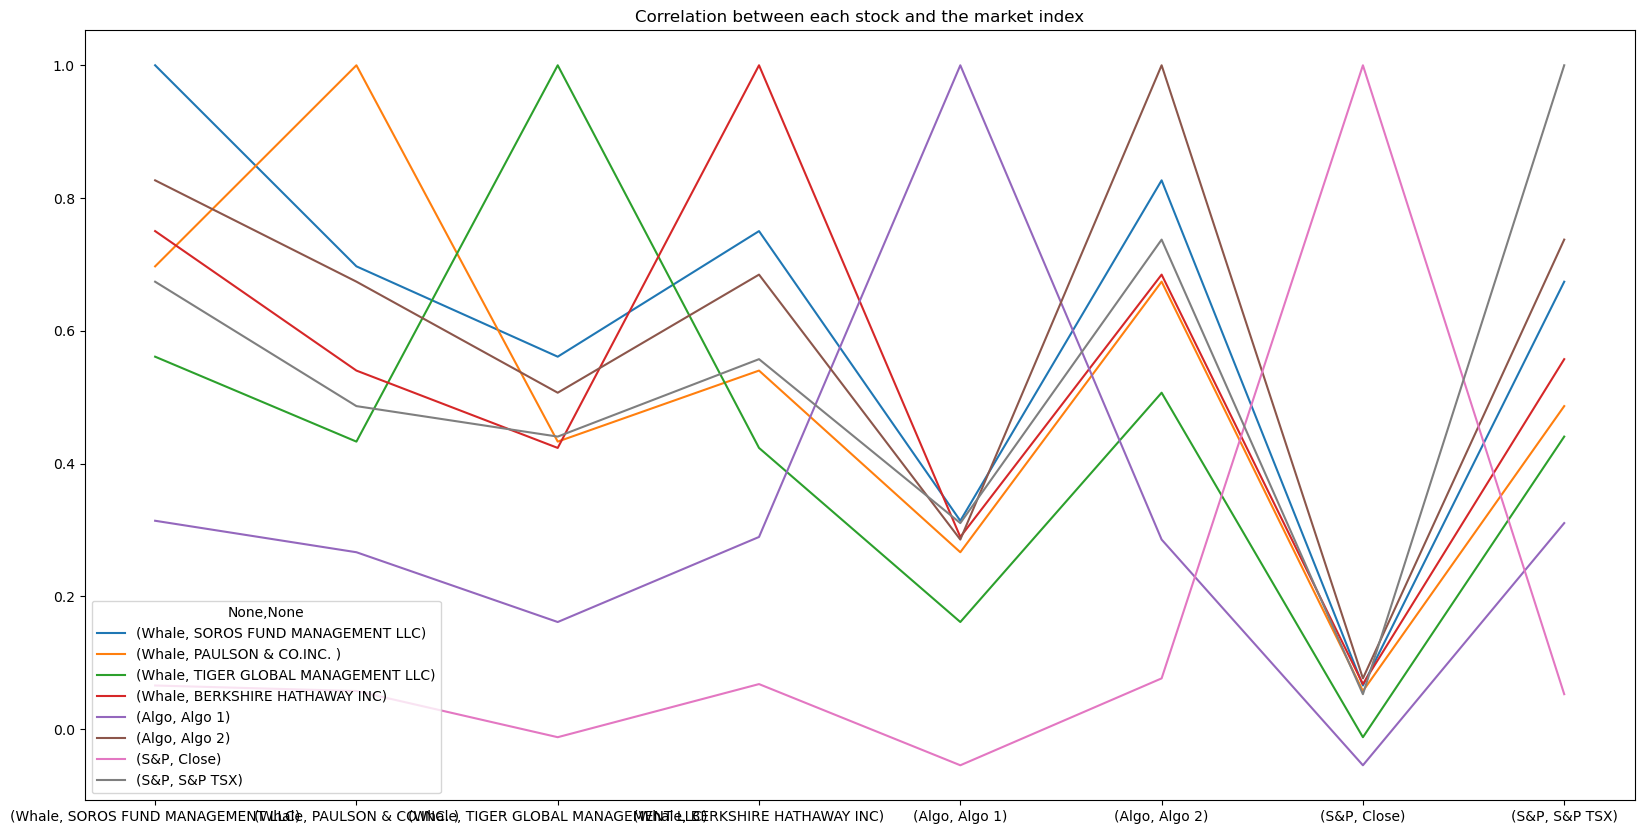

In [31]:
df.corr().plot(figsize=(20,10), title = "Correlation between each stock and the market index")

In [ ]:
### Algo 2 is highly correlated to the S&P: correlation coefficient =  0.7373. In other words, 73.73% of the variation in returns of Algo 2 can be explained by the movements in the S&P TSX 60.
### Soros Fund Management is highly correlated to the S&P (coeff = 0.673930). In other words, 67.39% of the variation in returns of Soros Fund can be explained by the movements in the S&P TSX 60.
### Berkshire Hathaway is moderately correlated to the S&P (coeff = 0.557250). In other words, 55.73% of the variation in returns of Berkshire Hathaway can be explained by the movements in the S&P TSX 60.

In [ ]:
### Given that the second stock in the Algo portfolio (Algo 1) has a low correlation with the S&P TSX, I will not consider that it is closely related to the S&P.
### However, in the Whale portfolio, 2 out of the 4 stocks have a moderate to high correlation with the S&P TSX. The Paulson stock is 2% away from being moderately correlated to the S&P. So we can iner that the Whale porfolio mimicks the S&P TSX 60.

In [ ]:
# Choose one portfolio, then calculate and plot the 60-day rolling beta between that portfolio and the S&P TSX 60.
# I choose Algo 

In [ ]:
#variance S&P
# the data on the S&P starts in 2012, and in 2014 for Algo. To ensure that the correlation between both is correct, I'm going to use the intersection in data between the two. So I'm basing the calculation on the df dataframe starting in 2015.
variance = df['S&P TSX'].var()
variance

In [ ]:
# calculating the daily returns of Algo in the join data frame 
weights2 = [0.5, 0.5]
new_algo_portfolio_returns = df[['Algo 1','Algo 2']].dot(weights2)
new_algo_portfolio_returns

In [ ]:
# covariance between Algo portfolio and S&P
covariance = new_algo_portfolio_returns.cov(df['S&P TSX'])
covariance

In [ ]:
# Calculate 60-day rolling covariance of Algo vs. S&P 500 
rolling_covariance = new_algo_portfolio_returns.rolling(window=60).cov(df['S&P TSX'])
rolling_covariance

In [ ]:
# Calculate 60-day rolling variance of S&P 500 
rolling_variance = df['S&P TSX'].rolling(window=60).var()
rolling_variance

In [ ]:
# Calculate 60-day rolling beta of Algo and plot the data
rolling_beta = rolling_covariance / rolling_variance
rolling_beta

In [ ]:
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo')

In [ ]:
#Rolling Statistics Challenge
new_algo_portfolio_returns.ewm(halflife=21).std().plot()

In [ ]:

def weighted_moving_average(i) :
    EWMA = []
  
    for i in new_algo_portfolio_returns:
                weighted_moving_average = new_algo_portfolio_returns[i+1]*(21/(1+len(new_algo_portfolio_returns)))+ EWMA(i-1)*(1-(21/(1+len(new_algo_portfolio_returns))))

    return weighted_moving_average(i)

print(EWMA)

In [ ]:
#Using the daily returns, calculate the Sharpe ratios and visualise them in a bar plot.

#Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

In [ ]:
#Using the daily returns, calculate the Sharpe ratios 
# Since we're comparing the 3 portfolios on the same plot I'm going to use the overlapping data between all portfolios
df['S&P TSX']
new_algo_portfolio_returns
df

In [ ]:
new_whale_portfolio_returns = df[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']]
new_whale_portfolio_returns 

In [ ]:
sharpe_ratios = ((all_portfolios_returns.mean()-all_portfolios_returns['rf_rate'].mean()) * 252) / (all_portfolios_returns.std() * np.sqrt(252))
sharpe_ratios

In [ ]:
CGAU Centerra Gold

In [ ]:
TSLA Tesla

In [ ]:
STRL Sterling infrastructure

In [ ]:
OTEX, L and SHOP.

In [ ]:
df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

In [48]:
csv_path4 =  Path("Starter_code/Resources/otex_historical.csv")
otex_returns = pd.read_csv(csv_path4, parse_dates=True, index_col='Date',infer_datetime_format=True)

otex_returns.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [52]:
#otex_returns = otex_returns(columns={'Close':'O Close'})

In [53]:
csv_path5 =  Path("Starter_code/Resources/l_historical.csv")
l_returns = pd.read_csv(csv_path5, parse_dates=True, index_col='Date',infer_datetime_format=True)

l_returns.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [54]:
csv_path6 =  Path("Starter_code/Resources/shop_historical.csv")
shop_returns = pd.read_csv(csv_path6, parse_dates=True, index_col='Date',infer_datetime_format=True)

shop_returns.head()

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [55]:
# Combine all stocks in a single DataFrame
df = pd.concat([whale_returns2, algo_returns2, sp_tsx2], axis="columns", join="inner")

In [59]:
df_stocks = pd.concat([otex_returns,l_returns,shop_returns], axis=0, join="inner")
df_stocks

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16
...,...,...
2019-12-20,SHOP,513.22
2019-12-23,SHOP,511.62
2019-12-24,SHOP,525.39


In [66]:
# Reorganize portfolio data by having a column per symbol
# Reorganize the DataFrame

# Separate ticker data
OTEX = df_stocks[df_stocks['Symbol']=='OTEX'].drop('Symbol', axis=1)
L = df_stocks[df_stocks['Symbol']=='L'].drop('Symbol', axis=1)
SHOP = df_stocks[df_stocks['Symbol']=='SHOP'].drop('Symbol', axis=1)
df_stock = pd.concat([OTEX, L, SHOP],axis=1, keys =['OTEX', 'L', 'SHOP'])
df_stock

,OTEX,L,SHOP
,Close,Close,Close
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51
...,...,...,...
2019-12-20,58.68,67.90,513.22
2019-12-23,57.89,67.68,511.62


In [ ]:
# Concatenate the ticker DataFrames
df_portfolio_year = pd.concat([FB, TWTR],axis=1, keys=['FB','TWTR'])

# Display sample data
df_portfolio_year

In [ ]:
OTEX = df_finaldf_stocks